# R kernel

In [2]:
suppressMessages({
library(ggplot2)
library(dplyr)
library(tidyr)
library(ggpubr)
library(cowplot)
library(gridExtra)
library(rstatix)
library(reshape2)
library(ggnewscale)
library(RColorBrewer)
library(ComplexHeatmap)
library(SeuratDisk)
library(Seurat)
}) 

In [1]:
mytheme = function(){
theme_bw() +
theme(axis.text.x=element_text(size=6,color='black'),
    axis.text.y=element_text(size=6,color="black"),
    axis.title.y=element_text(size=6,color="black"),
    axis.title.x=element_text(size=6,color="black"),
    #axis.ticks.x=element_blank(),
    axis.ticks.length=unit(.02, "in"),
    axis.line = element_line(color = "black", linewidth = 0.25),
    axis.ticks = element_line(color = "black", linewidth = 0.25),
    strip.text.x = element_text(size = 6,margin = margin(0.1,0,0.1,0, "cm")),
    strip.text.y = element_text(size = 6,margin = margin(0,0.1,0,0.1, "cm")),
    strip.background=element_rect(linewidth=0.25),
    legend.text=element_text(size=6,color="black"),
    legend.title=element_text(size=6,color="black"),
    legend.key.width=unit(0.2,'cm'),
    legend.key.height=unit(0.2,'cm'),
    legend.box.margin=margin(0,0,0,2),
    legend.box.spacing = unit(0, "pt"),
    panel.spacing = unit(0.1, "cm"),
    plot.title = element_text(size=5),
    #panel.border = element_rect(size=0.25,color="black"),
    panel.grid = element_blank()
)
}

In [60]:
celltype_color = c(
    "Keratinocytes" ="#CCFF00FF",
    "Melanocytes" = "#FF4A46",
    "Schwann cells" = "#A30059",
    "Sweat gland cells" = "#006FA6",
    "Fibroblasts" = "#8FB0FF",
    "Endothelial cells" ="#B79762",
    "Smooth muscle cells" ="#6B7900",
    "T cells" = "#63FFAC",
    "NK cells" = "#9467BD" ,
    "B cells" = "#FF34FF",
    "Plasma cells" ="#FF7F0EFF",
    "Macrophage/DC" = "#008941",
    "Mast cells" = "#6A3A4C"
)

## Fig.S9A

In [20]:
Immune_num = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/Immune_num_select_area.txt",head=T, row.names=1)
RCLASI = read.table("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/KC/RCLASI.txt",head=T)
Immune_num = cbind(RCLASI, Immune_num)

In [21]:
Immune_num = melt(Immune_num,measure.vars = c('Immune_density','Immune_TB_density'))
Immune_num$variable = gsub("Immune_density", "Total immune cell density", Immune_num$variable)
Immune_num$variable = gsub("Immune_TB_density", "TB immune cell density", Immune_num$variable)
Immune_num$variable = factor(Immune_num$variable, levels = c("Total immune cell density","TB immune cell density"))

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

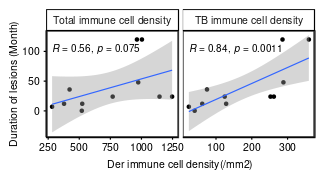

In [72]:
plot = ggplot(Immune_num, aes(x=value, y=Duration_of_lesions)) + 
    geom_point(shape=19, stroke=NA, size=1) +
    geom_smooth(method=lm, lwd=0.25) +
    stat_cor(size=2, method = 'spearman') + #label.x = 300,label.y = 100,
    facet_wrap(.~variable, ncol=2, scales='free_x') +
    labs(y= 'Duration of lesions (Month)', x = 'Der immune cell density(/mm2)') + 
    mytheme() +
    theme(strip.background=element_rect(size=0.25, color='black', fill="white")
    )

options(repr.plot.width= 2.7,repr.plot.height = 1.5)
plot

pdf("../../figures/Duration_of_lesions_cell_density_correlation.pdf", w=2.7,h=1.5)
plot
dev.off()

## Fig.S9B

In [28]:
merge_leiden_cluster = read.csv("../Figure4/Immu_Merge_leiden_cluster_metadata.csv",head=T)
merge_leiden_cluster$group = factor(merge_leiden_cluster$group, levels=c("HC",'DLE','SLE'))

In [29]:
celltype_color = c(
    "T cells" = "#63FFAC",
    "NK cells" = "#9467BD" ,
    "B cells" = "#FF34FF",
    "Plasma cells" = "#FF7F0EFF",
    "Macrophage/DC" = "#008941"
)

In [36]:
cluster_stats <- merge_leiden_cluster %>%
  group_by(leiden, celltype) %>%
  summarise(count = n()) %>%
  mutate(percentage = count / sum(count) * 100)
cluster_stats$celltype = factor(cluster_stats$celltype , levels=names(celltype_color))

`summarise()` has grouped output by 'leiden'. You can override using the
`.groups` argument.


In [42]:
cluster_mapping = c(
    '16' = '0',
    '15' = '1',
    '10'= '2',
    '6'= '3',
    '11'= '4',
    '14'= '5',
    '4'= '6',
    '7'= '7',
    '8'= '8',
    '12'= '9',
    '0'= '10',
    '2'= '11',
    '5'= '12',
    '9'= '13',
    '1'= '14',
    '3'= '15',
    '13'= '16'
)

In [48]:
cluster_stats$leiden_new <- cluster_mapping[ as.character(cluster_stats$leiden) ]
cluster_stats$leiden_new = factor(cluster_stats$leiden_new, levels=unname(cluster_mapping))

png 
  2

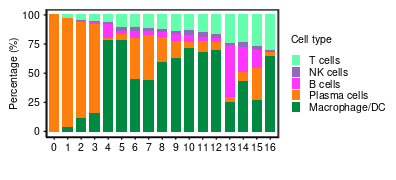

In [73]:
All_plot = ggplot(cluster_stats,aes(x=leiden_new,y=percentage,fill=celltype)) +
    geom_bar(stat = "identity",width=0.7) +
    labs(x="",y="Percentage (%)",fill="Cell type") +
    scale_fill_manual(values=celltype_color) +
    mytheme()
options(repr.plot.width= 3.3,repr.plot.height = 1.5)
All_plot

pdf('../../figures/Cellbin_immunecell_leiden_original_cluster_barplot.pdf', w=3.3,h=1.5)
All_plot
dev.off()

## Fig.S9D

In [23]:
TLS_area = read.csv("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS_area.txt",head=T)
TLS_area = merge(RCLASI, TLS_area)

`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'


png 
  2

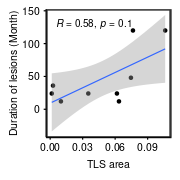

In [76]:
plot = ggplot(TLS_area, aes(x=TLS_density, y=Duration_of_lesions)) + 
    geom_point(shape=19, stroke=NA, size=1) +
    geom_smooth(method=lm, lwd=0.25) +
    stat_cor(label.x = 0.005,label.y = 130,size=2 , method = 'spearman') +
    labs(y= 'Duration of lesions (Month)', x = 'TLS area') + 
    mytheme()
options(repr.plot.width= 1.5,repr.plot.height = 1.5)
plot

pdf("../../figures/Duration_of_lesions_TLS_area_correlation.pdf",  w=1.5,h=1.5)
plot
dev.off()

# Python kernel

In [1]:
import scanpy as sc
import anndata as ad
import pandas as pd
from shapely.geometry import GeometryCollection, Polygon
import matplotlib.backends.backend_pdf as pdf_backend
import warnings
warnings.filterwarnings('ignore')
import importlib

import utils_20250718
importlib.reload(utils_20250718)
from utils_20250718 import *

<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


## Fig.S9C

In [3]:
ST_adata = sc.read_h5ad('/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Cellbin_h5ad_raw/All_samples_Cellbin_filter_gene200_add_anno_dist.h5ad')

In [2]:
merge_cluster_adata = sc.read("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Immu_Merge_leiden_cluster_metadata.h5ad")

In [5]:
leiden_merged_color = {
 '1': '#59a14f',
 '2': '#76b7b2',
 '3': '#ff9da7',
 '4': '#e15759',
 '5': '#4e79a7',
 '6': '#b07aa1',
 '7': '#f28e2b',
 '8': '#9c755f'}

[16:47:31] ❕  ssat is not registered, register now                                           ]8;id=716452;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=952206;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[16:47:37] ❕  ssat is not registered, register now                                           ]8;id=646942;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=973471;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `leiden_merged_1` to adata.uns                                ]8;id=243426;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=989861;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

[16:47:40] ❕  ssat is not registered, register now                                           ]8;id=255876;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=388234;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[16:47:46] ❕  ssat is not registered, register now                                           ]8;id=296036;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=832375;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `leiden_merged_1` to adata.uns                                ]8;id=770082;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=470962;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

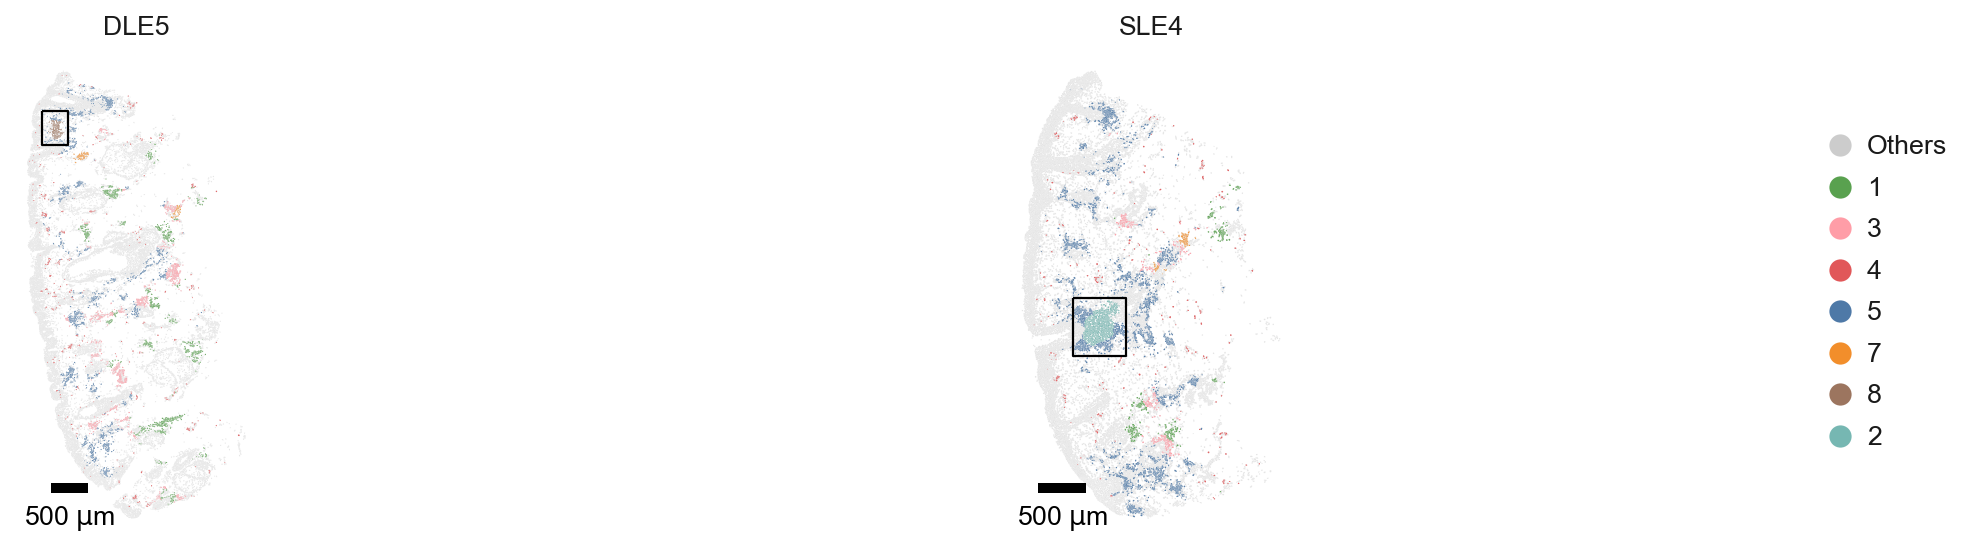

In [12]:
polygons = {
'DLE5' : [Polygon([[13100,20500], [13800,20500],[13800,19600], [13100,19600]])],
'SLE4' : [Polygon([[9500,10400], [10600,10400],[10600,9200], [9500,9200]])]
}

fig, axs =plt.subplots(figsize=(15, 4), ncols=2,nrows=1) 
axs = axs.flatten()

samples = ['DLE5',"SLE4"]
for i, sample in enumerate(samples):
    sample_adata_immu = merge_cluster_adata[merge_cluster_adata.obs['sample'].str.contains(sample)]
    sample_adata = ST_adata[ST_adata.obs['sample'] == sample]
    ax = dimplot(sample_adata, reduction="contour", dot_size=10, legend=False, ax=axs[i])
    dimplot(sample_adata_immu, groupby="leiden_merged_1", reduction="contour", ax=ax, dot_size=50, legend=False, palette=leiden_merged_color)
    ax.set_title(sample)
    draw_scalebar(ax=ax, location='lower left',color='black')
    gpd.GeoSeries(polygons[sample]).plot(ax=ax, edgecolor='black',facecolor='none', linewidth=1)
plot_legend(fig=fig)

In [14]:
celltype_color = {
    "Keratinocytes" :"#CCFF00FF",
    "Melanocytes" : "#FF4A46",
    "Schwann cells" : "#A30059",
    "Sweat gland cells" : "#006FA6",
    "Fibroblasts" : "#8FB0FF",
    "Endothelial cells" :"#B79762",
    "Smooth muscle cells" :"#6B7900",
    "T cells" : "#63FFAC",
    "NK cells" : "#9467BD" ,
    "B cells" : "#FF34FF",
    "Plasma cells" :"#FF7F0EFF",
    "Macrophage/DC" : "#008941",
    "Mast cells" : "#6A3A4C"
}

[17:04:12] 📃  Filtering contour within bounding box [13100, 19600, 13800, 20500]            ]8;id=418712;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=161351;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           📃  Filtering contour within bounding box [13100, 19600, 13800, 20500]            ]8;id=250085;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=64720;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=964777;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=561141;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=600522;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=612246;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[17:04:13] 📃  add palette for `celltype` to adata.uns                                       ]8;id=424051;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=267460;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

           📃  Filtering contour within bounding box [9500, 9200, 10600, 10400]              ]8;id=800155;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=761448;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           📃  Filtering contour within bounding box [9500, 9200, 10600, 10400]              ]8;id=362524;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=157326;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#2653\2653]8;;\

           ❕  ssat is not registered, register now                                           ]8;id=36174;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=346234;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[17:04:14] ❕  ssat is not registered, register now                                           ]8;id=684244;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=436544;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `celltype` to adata.uns                                       ]8;id=877235;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=628257;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

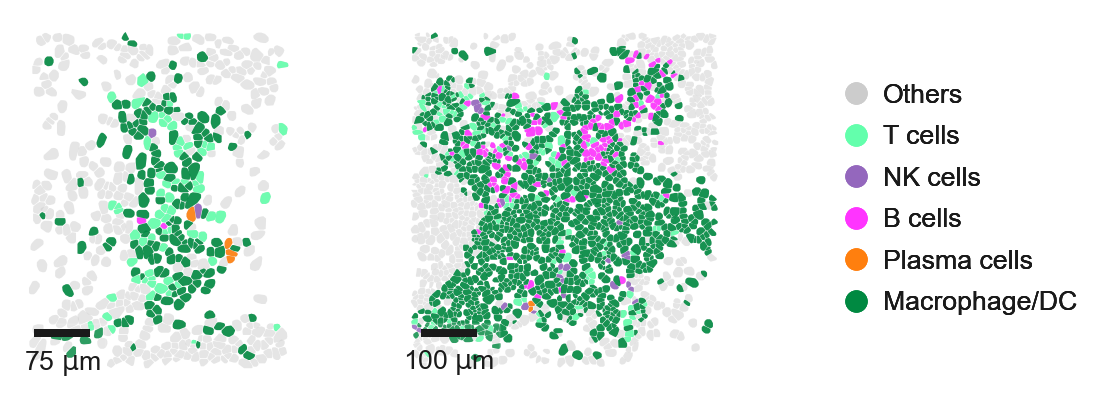

In [28]:
zone = {
'DLE5' : [13100,19600,13800,20500],
'SLE4' : [9500, 9200, 10600, 10400] #
}

fig, axs = plt.subplots(nrows=1,ncols=2,figsize=(6, 3))    
samples = ["DLE5","SLE4"]
for i, sample in enumerate(samples):
    ax = axs[i]
    
    sample_adata = ST_adata[(ST_adata.obs['sample'] == sample)]
    zone_adata_1 = within(sample_adata, zone[sample], reduction='contour', inplace=True)

    sample_adata_immu = merge_cluster_adata[merge_cluster_adata.obs['sample'] == sample]
    zone_adata_2 = within(sample_adata_immu, zone[sample], reduction='contour', inplace=True)
    ax = dimplot(zone_adata_1, reduction="contour", legend=False , ax=ax)
    dimplot(zone_adata_2,background=True, reduction="contour",groupby='celltype', order=['T cells','NK cells','B cells','Plasma cells','Macrophage/DC'], 
       legend=True,palette=celltype_color, ax=ax)
    draw_scalebar(ax=ax, location='lower left')
plot_legend(fig=fig)

## Fig.S9E

[17:09:57] ❕  ssat is not registered, register now                                           ]8;id=633237;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=662249;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

[17:10:06] ❕  ssat is not registered, register now                                           ]8;id=7685;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=125458;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#286\286]8;;\

           📃  add palette for `TLS_region` to adata.uns                                     ]8;id=827150;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py\utils_20250718.py]8;;\:]8;id=442551;file:///share/home/bgi_huangyf/Jupyter/Skin_SLE/Code_upload/Supp.Figures/utils_20250718.py#1526\1526]8;;\

<Axes: >

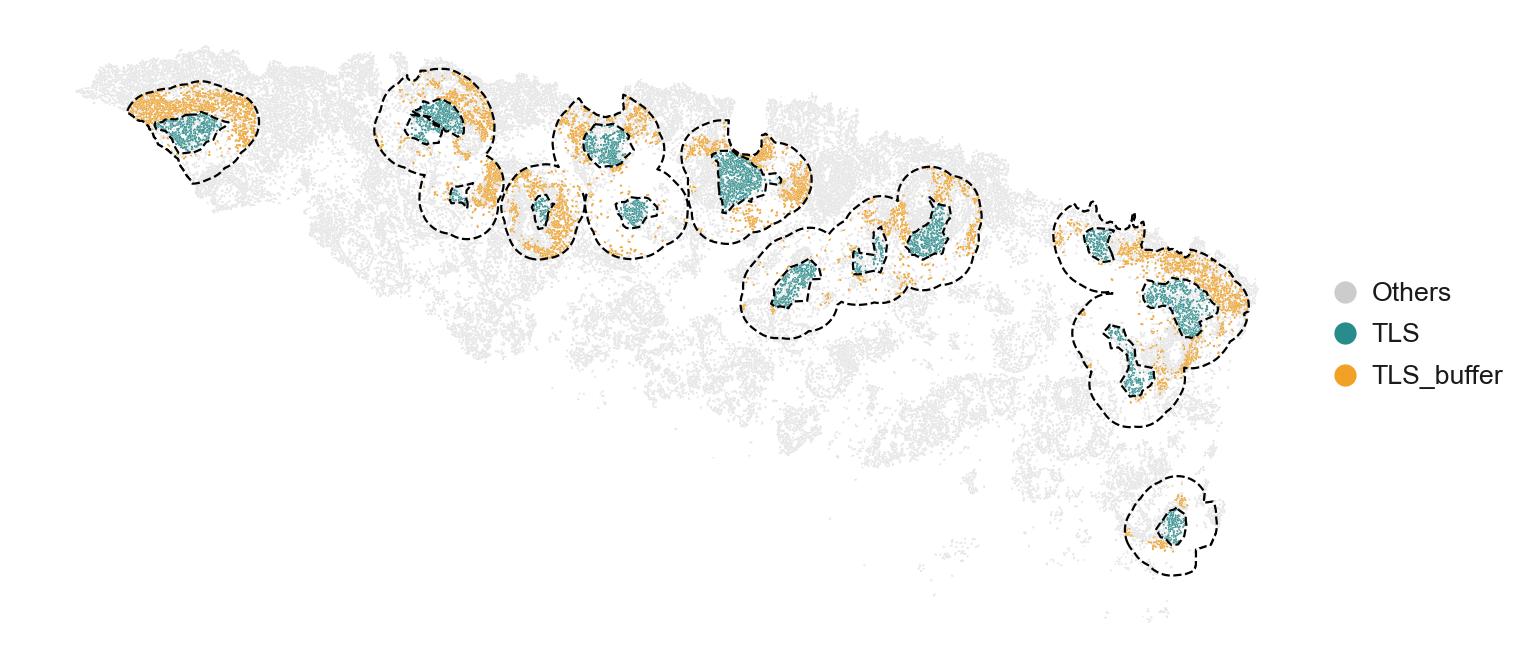

In [31]:
TLS_region_color = {
    'TLS_buffer' : '#f1a226',
    'TLS' : '#298c8c'
}

shp_TLS = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/SLE2_cell_contour.shp")
shp_buffer = gpd.read_file(f"/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/Cell_contour_shp/SLE2_cell_contour_buffer.shp")
merged_adata = sc.read("/share/appspace_data/shared_groups/bgi_huangyf_project/Skin/Celltype_analysis/Immu_cell/TLS/All_sample_Immune_TLS_and_buffer_region_adata.h5ad")

sample_adata = ST_adata[(ST_adata.obs['sample'] == 'SLE2') & (ST_adata.obs['Region'] == 'Der')]
TLS_adata = merged_adata[(merged_adata.obs['sample'] == 'SLE2') & (merged_adata.obs['Region'] == 'Der')]
ax = dimplot(sample_adata, background=True, height=10, reduction="contour", dot_size=20, legend=False)
dimplot(TLS_adata, background=False, height=10, reduction="contour", dot_size=20, ax=ax,groupby='TLS_region',legend=True, palette = TLS_region_color)
shp_buffer.plot(ax=ax, edgecolor='black',facecolor='none', linestyle='--', linewidth=1)